# Answer to homework 1

# 1.1

[Code](#1.2-Theory)

$\theta = [1.4, -1.42639945]$

## 1.2

[Code](#1.2-Theory)

### a)
$$g(x) = (x-1)^4$$

$$\frac{dg(x)}{dx} = 4(x-1)^3$$

### b)
$$\frac{dg(x)}{dx} = 0$$

$$\rightarrow 4(x-1)^3 = 0$$

$$\rightarrow x - 1 = 0$$

$$\rightarrow x = 1$$

### c)

See plot at
[Theory 1.2 plot](#1.2-Theory)

# 2. 

[Code](#2.-Closed-Form-Linear-Regression)

## a)

Final Model:
$\theta = [3275.66666667, 1079.15470166, -254.96912814]$

$\text{Length of fish} = 3275.66666667 + 1079.15470166\times \text{age} - 254.96912814 \times \text{temp}$

## b)

RMSE = 601.9302894996969

# 3.

[Code](#3.-S-Folds-Cross-Validation)

## S=3
Mean = 638.1605257886098
Stddev = 29.863220631637862

## S=5
Mean = 627.3123633779803
Stddev = 15.076209407367639

## S=20
Mean = 617.5507653457546
Stddev = 11.61689182709452

## S=44
Mean = 623.4051391831035
Stddev = 1.1080822269842614e-13

# 4.

[Code](#4.-Locally-Weighted-Linear-Regression)

RMSE = 308.0661427130935

# 5.

[Code](#5.-Gradient-Descent)

## a)
Final model: 
$\theta = [3275.64894028 1079.14504956 -254.96127034]$

$\text{Length of fish} = 3275.64894028 + 1079.14504956\times \text{age} - 254.96127034 \times \text{temp}$


## b)
Final RMSE Test: 601.9237955195581


## c)
See plot at [Gradient Descent training plot](#Gradient-Descent-training-plot)

In [1]:
import os
import csv
import math
import random
import copy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [4]:
if 'src' not in os.getcwd():
    os.chdir(f"{os.getcwd()}/src")

# 1.1 Theory

In [5]:
x = np.array([[-2, -5, -3, 0, -6, -2, 1, 5, -1, 3]]).T
y = np.array([[1, -4, 1, 3, 11, 5, 0, -1, -3, 1]]).T

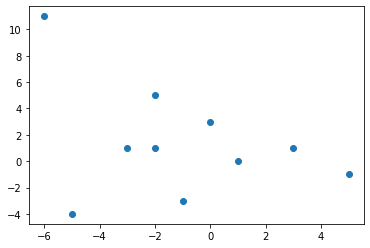

In [6]:
plt.scatter(x, y)

In [7]:
# Standardize x
x_mean = np.mean(x)
x_std = np.std(x)
x_standardized = (x - x_mean)/x_std

In [8]:
# Add bias vector to x
x_standardized = np.append(np.ones([len(x), 1]), x_standardized, 1)
x_standardized

array([[ 1.        , -0.31008684],
       [ 1.        , -1.24034735],
       [ 1.        , -0.62017367],
       [ 1.        ,  0.31008684],
       [ 1.        , -1.55043418],
       [ 1.        , -0.31008684],
       [ 1.        ,  0.62017367],
       [ 1.        ,  1.86052102],
       [ 1.        ,  0.        ],
       [ 1.        ,  1.24034735]])

In [9]:
# theta = (x.T * x)^-1 * (x.T * y)
def linear_regression(x, y):
    a = np.linalg.inv(np.dot(x.T, x))
    b = np.dot(x.T, y)
    return np.dot(a, b)
theta = linear_regression(x_standardized, y)
theta

array([[ 1.4       ],
       [-1.42639945]])

In [10]:
# Verify with sklearn linear regression:
linreg = LinearRegression().fit(x_standardized, y)
print(f'Coefficients: {linreg.coef_}, Intercept: {linreg.intercept_}')

Coefficients: [[ 0.         -1.42639945]], Intercept: [1.4]


# 1.2 Theory

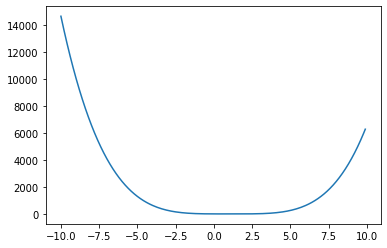

In [11]:
x = np.arange(-10, 10, 0.1)
g_x = (x - 1)**4
plt.plot(x, g_x)

# 2. Closed Form Linear Regression 

In [12]:
# Read the CSV file. ignore header and first column
df = pd.read_csv('x06Simple.csv', sep=',',header=0)
data = df.values[:,1:]

In [13]:
# Seed the randomizer
np.random.seed(0)

In [14]:
# Shuffle data
shuffled = copy.deepcopy(data)
np.random.shuffle(shuffled)

In [15]:
# Split data into training and testing sets
split_idx = math.ceil(len(shuffled)/3*2)
x_train = shuffled[0:split_idx, :-1]
y_train = shuffled[0:split_idx, -1]
x_test = shuffled[split_idx:, :-1]
y_test = shuffled[split_idx:, -1]

In [16]:
# Standardize x
def standardize_x(x_train, x_test):
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

x_train, x_test = standardize_x(x_train, x_test)

In [17]:
# Add bias feature to x
x_train = np.append(np.ones([len(x_train), 1]), x_train, 1)
x_test = np.append(np.ones([len(x_test), 1]), x_test, 1)

In [18]:
# Do linear regression!
theta = linear_regression(x_train, y_train)
theta

array([3275.66666667, 1079.15470166, -254.96912814])

In [19]:
# Predict x_test
y_test_predict = np.dot(x_test, theta)

In [20]:
rmse = lambda actual, predict: np.sqrt(np.mean((actual - predict)**2))

In [21]:
print(f'RMSE: {rmse(y_test, y_test_predict)}')

RMSE: 601.9302894996969


# 3. S-Folds Cross-Validation

In [22]:
def s_fold_lin_reg(data, S, n_times):
    rmse_arr = np.zeros(n_times)
    for i in range(n_times):
        kf = KFold(n_splits=S, shuffle=True, random_state=i)
        accum_error = 0
        for train_index, test_index in kf.split(data):
            x_train, x_test = data[train_index], data[test_index]
            y_train, y_test = data[train_index], data[test_index]
            x_train = x_train[:,:-1]
            x_test = x_test[:,:-1]
            y_train = y_train[:,-1]
            y_test = y_test[:,-1]

            x_train, x_test = standardize_x(x_train, x_test)
            
            x_train = np.append(np.ones([len(x_train), 1]), x_train, 1)
            x_test = np.append(np.ones([len(x_test), 1]), x_test, 1)

            theta = linear_regression(x_train, y_train)
            y_test_predict = np.dot(x_test, theta)
            accum_error += np.mean((y_test_predict - y_test)**2)
        rmse_arr[i] = np.sqrt(accum_error/S)
        
    return rmse_arr, np.mean(rmse_arr), np.std(rmse_arr)

In [23]:
_, rmse_mean, rmse_std = s_fold_lin_reg(data, 3, 20)
print(f"S=3, rmse_mean={rmse_mean}, rmse_std={rmse_std}")

_, rmse_mean, rmse_std = s_fold_lin_reg(data, 5, 20)
print(f"S=5, rmse_mean={rmse_mean}, rmse_std={rmse_std}")

_, rmse_mean, rmse_std = s_fold_lin_reg(data, 20, 20)
print(f"S=20, rmse_mean={rmse_mean}, rmse_std={rmse_std}")

_, rmse_mean, rmse_std = s_fold_lin_reg(data, data.shape[0], 20)
print(f"S={data.shape[0]}, rmse_mean={rmse_mean}, rmse_std={rmse_std}")

S=3, rmse_mean=638.1605257886098, rmse_std=29.863220631637862
S=5, rmse_mean=627.3123633779803, rmse_std=15.076209407367639
S=20, rmse_mean=617.5507653457546, rmse_std=11.61689182709452
S=44, rmse_mean=623.4051391831035, rmse_std=1.1080822269842614e-13


# 4. Locally-Weighted Linear Regression

In [24]:
# Seed the randomizer
np.random.seed(0)

# Shuffle data
shuffled = copy.deepcopy(data)
np.random.shuffle(shuffled)

# Split data into training and testing sets
split_idx = math.ceil(len(shuffled)/3*2)
x_train = shuffled[0:split_idx, :-1]
y_train = shuffled[0:split_idx, -1]
x_test = shuffled[split_idx:, :-1]
y_test = shuffled[split_idx:, -1]
x_train, x_test = standardize_x(x_train, x_test)

In [25]:
# Add bias feature to x
x_train = np.append(np.ones([len(x_train), 1]), x_train, 1)
x_test = np.append(np.ones([len(x_test), 1]), x_test, 1)

In [26]:
k = 1 # Fall-off factor
l1_dist = lambda x1, x2: np.sum(np.abs(x1-x2))
l2_dist = lambda x1, x2: np.sum((x1-x2)**2)
sim_func = lambda a, b: np.exp(-l1_dist(a,b)/(k**2))

In [27]:
accum_error = 0
for sample_x, sample_y in zip(x_test, y_test):
    beta = np.zeros((x_train.shape[0], 1))
    for i in range(x_train.shape[0]):
        beta[i] = sim_func(sample_x, x_train[i])
    W = np.diag(np.reshape(beta, x_train.shape[0]))
    a = np.linalg.inv(x_train.T.dot(W).dot(x_train))
    b = x_train.T.dot(W).dot(y_train)
    theta = np.dot(a, b)
    
    y_test_predict = np.dot(sample_x, theta)
    accum_error += (y_test_predict - sample_y)**2
    
rmse_ = np.sqrt(accum_error/x_test.shape[0])
rmse_

308.0661427130935

# 5. Gradient Descent

In [28]:
np.random.seed(0)
theta = 2 * np.random.rand(x_train.shape[1]) - 1
rmse_arr_train = []
rmse_arr_test = []
rmse_prev = 100
rmse_change = 100
itr = 0

In [29]:
lr = 0.01
stop_itr = 1000
stop_rmse_delta = 2**(-23)

In [30]:
while itr < stop_itr:
    if itr > 0 and np.abs(rmse_change) < stop_rmse_delta:
        break
    theta -= lr * x_train.T.dot(x_train.dot(theta) - y_train)
    y_train_predict = np.dot(x_train, theta)
    y_test_predict = np.dot(x_test, theta)
    
    rmse_train = rmse(y_train, y_train_predict)
    rmse_test = rmse(y_test, y_test_predict)
    rmse_arr_train.append(rmse_train)
    rmse_arr_test.append(rmse_test)

    rmse_change = np.abs(rmse_train - rmse_prev)/rmse_prev*100
    rmse_prev = rmse_train

    itr += 1
    

## Gradient Descent training plot

Final model: [3275.64894028 1079.14504956 -254.96127034]
Final RMSE Test: 601.9237955195581


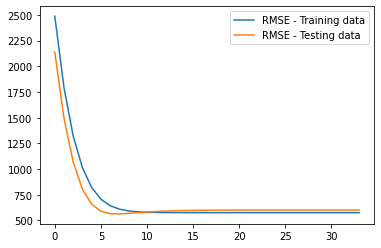

In [31]:
print("Final model:", theta)
plt.plot(range(itr), rmse_arr_train, label='RMSE - Training data')
plt.plot(range(itr), rmse_arr_test, label='RMSE - Testing data')
plt.legend()
print("Final RMSE Test:", rmse_test)